In [2]:
from matplotlib import pyplot as plt
%matplotlib notebook
import numpy as np
from skimage.io import imread,imsave

<IPython.core.display.Javascript object>


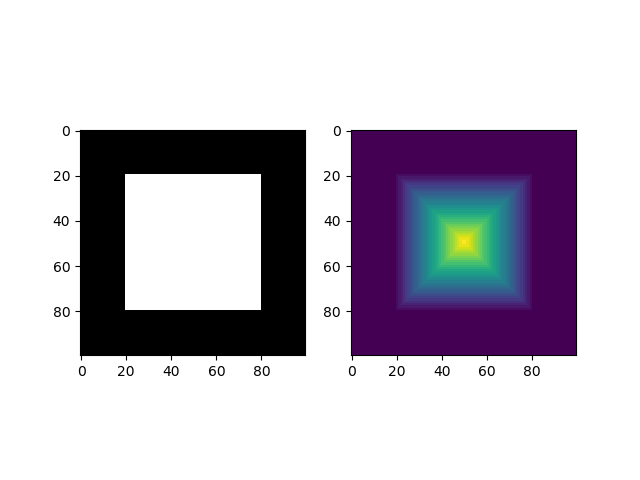

In [3]:
from scipy.ndimage import distance_transform_edt

im = np.zeros((100,100))
im[20:80,20:80] = 1

distance = distance_transform_edt(im)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(im, cmap=plt.cm.gray)
plt.subplot(1,2,2)
plt.imshow(distance)
plt.show()

(2000, 2000, 3)


<IPython.core.display.Javascript object>


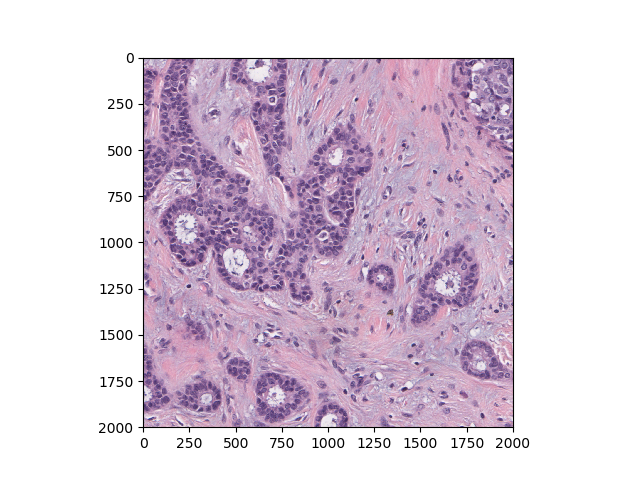

In [4]:
im = imread('nuclei1.tif')
print(im.shape)

plt.figure()
plt.imshow(im)
plt.show()

<IPython.core.display.Javascript object>


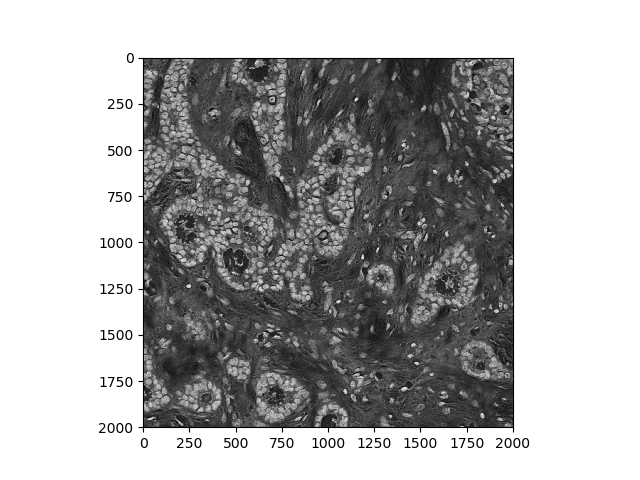

In [5]:
from skimage.color import rgb2hed

hed = rgb2hed(im)

plt.figure()
plt.imshow(hed[:,:,0], cmap=plt.cm.gray)
plt.show()

<IPython.core.display.Javascript object>


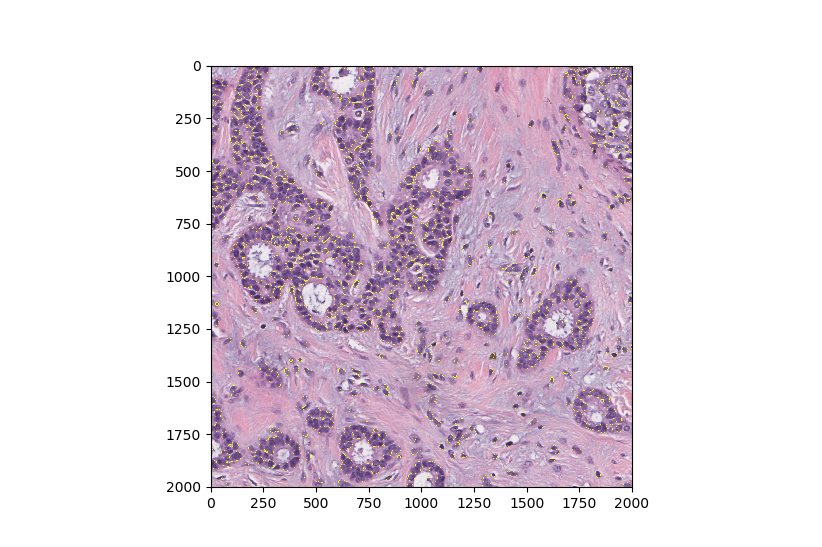

In [6]:
from skimage.color import rgb2hed
from skimage.filters import threshold_otsu
from skimage.morphology import opening,closing,disk
from skimage.segmentation import mark_boundaries

hed = rgb2hed(im)
t = threshold_otsu(hed[:,:,0])
mask = hed[:,:,0]>t
mask = closing(opening(mask, disk(7)), disk(3))

plt.figure()
plt.imshow(mark_boundaries(im,mask))
plt.show()

<IPython.core.display.Javascript object>


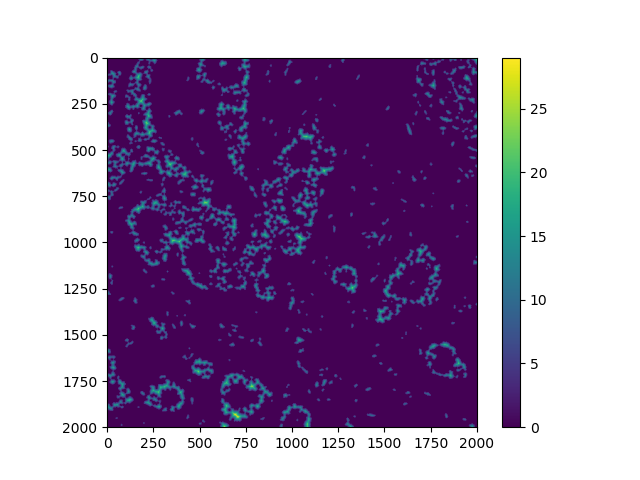

In [7]:
from scipy.ndimage import distance_transform_edt

distance = distance_transform_edt(mask)

plt.figure()
plt.imshow(distance)
plt.colorbar()
plt.show()

In [8]:
from skimage.feature import peak_local_max

markers = peak_local_max(distance, min_distance=3, indices=True)

In [9]:
print(markers.shape)

(1768, 2)


<IPython.core.display.Javascript object>


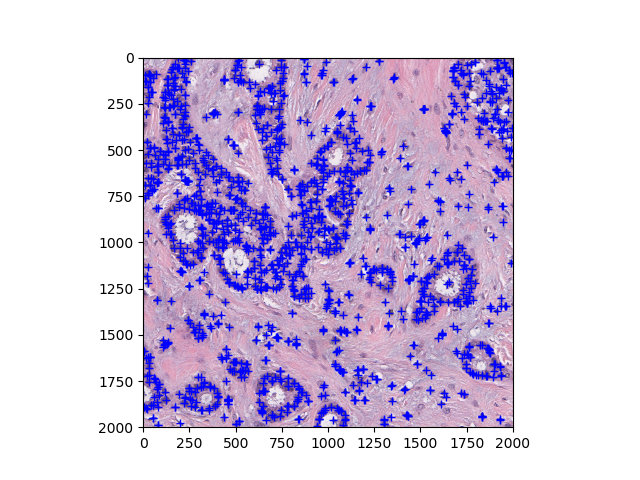

In [10]:
plt.figure()
plt.imshow(im)
for m in markers:
    plt.plot(m[1],m[0],'b+')
plt.show()

<IPython.core.display.Javascript object>


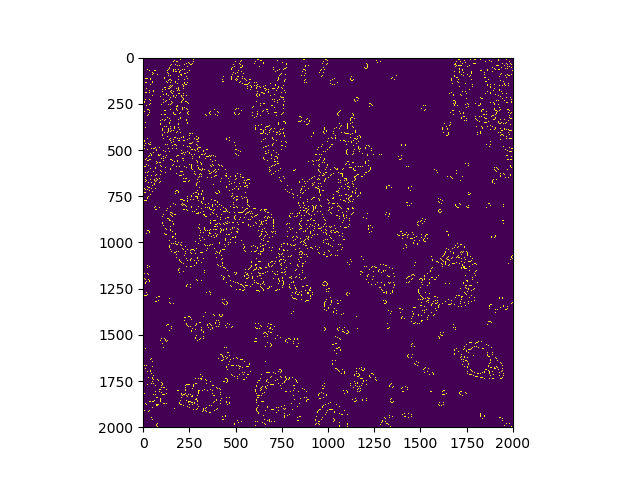

In [11]:
from skimage.filters.rank import gradient
from skimage.measure import label
from skimage.morphology import watershed

grad = gradient(mask,disk(1))
markers = label(peak_local_max(distance, min_distance=3, indices=False))

plt.figure()
plt.imshow(grad)
plt.show()

<IPython.core.display.Javascript object>


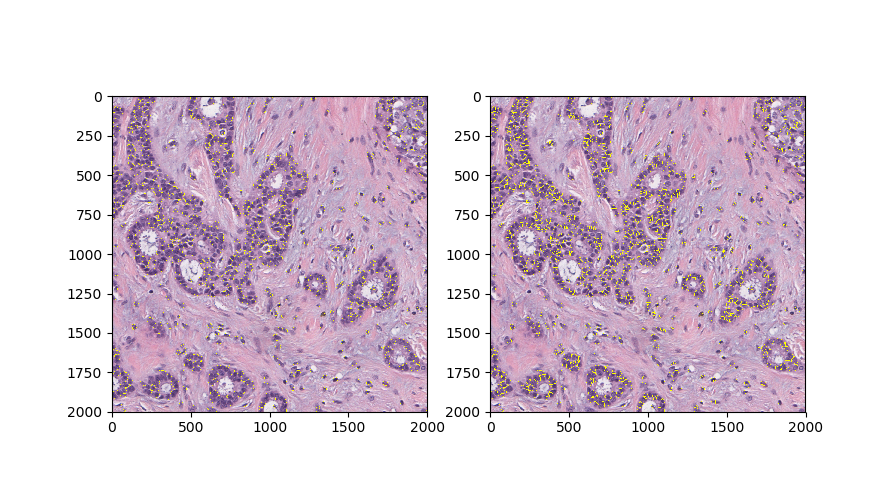

<IPython.core.display.Javascript object>


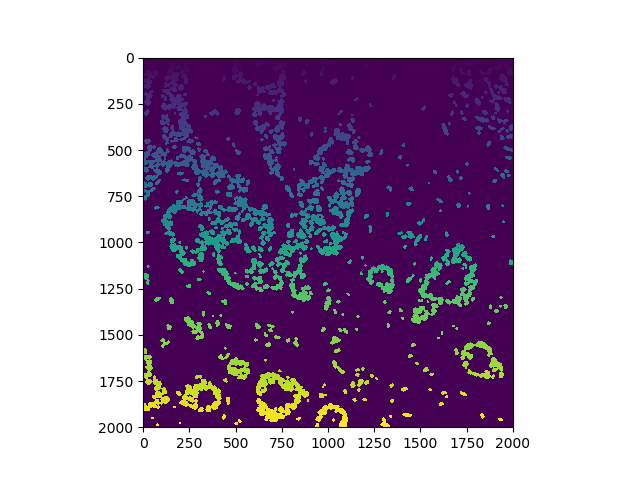

In [12]:
ws = watershed(grad,markers,mask=mask)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(mark_boundaries(im,mask))
plt.subplot(1,2,2)
plt.imshow(mark_boundaries(im,ws))
plt.figure()
plt.imshow(ws)
plt.show()

In [13]:
print(ws.max())

1352
